<a href="https://colab.research.google.com/github/akdubey/AKDU/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#The OS module in Python provides functions for creating and removing a directory (folder), fetching its contents, changing and identifying the current directory, etc. You first need to import the os module to interact with the underlying operating system
import os

In [ ]:
# Mount Your Drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dirname = '/content/drive/My Drive/Research/diabetes.csv'

In [ ]:
# Importing libraries
# Pandas is an open-source library that is made mainly for working with relational or labeled data both easily and intuitively. It provides various data structures and operations for manipulating numerical data and time series. 
#The sklearn library contains a lot of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
# Load Data
data = pd.read_csv('/content/drive/My Drive/Research/diabetes.csv')

In [ ]:
import pandas_profiling as pp
import numpy as np

In [ ]:
#from pandas_profiling import ProfileReport

In [ ]:
#data = pd.DataFrame(np.random.rand(100, 5), columns=["a", "b", "c", "d", "e"])

In [ ]:
#To generate the report, run
#profile = ProfileReport(data, title="Pandas Profiling Report")

In [ ]:
## Head shows first 5 rows
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
## Head shows first 10 rows
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
# tail shows last 5 rows
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
#The info() method prints information about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#The describe() method returns description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains these information for each column: count - The number of not-empty values. mean - The average (mean) value.
data.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#corr() is used to find the pairwise correlation of all columns in the dataframe. Any na values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored. Note: The correlation of a variable with itself is 1.
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
# columns gives column names of features
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
# shape gives number of rows and columns in a tuble
data.shape

(768, 9)

In [ ]:
# info gives data type like dataframe, number of sample or row, number of feature or column, feature types and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#The dtypes property is used to find the dtypes in the DataFrame. This returns a Series with the data type of each column.
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

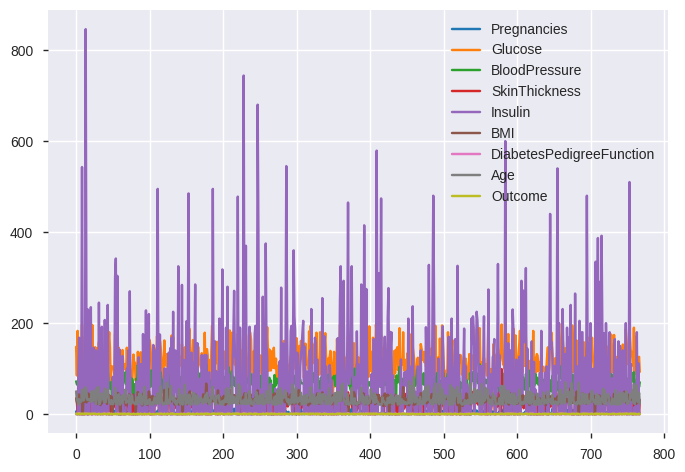

In [ ]:
# Plotting all data 
data1 = data.loc[:,["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]]
data1.plot()

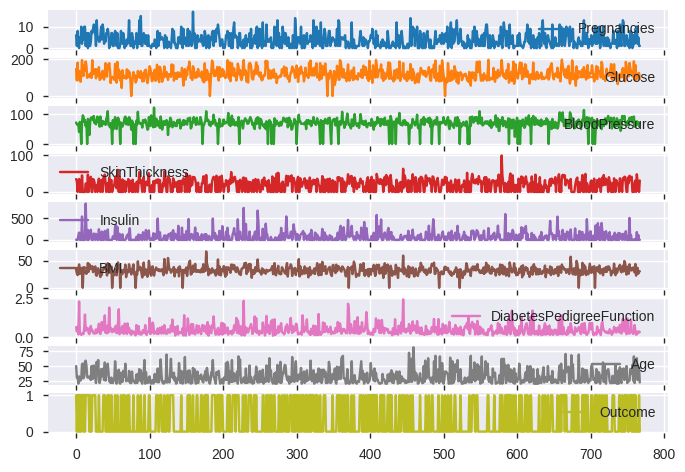

In [ ]:
# subplots
data1.plot(subplots = True)
plt.show()

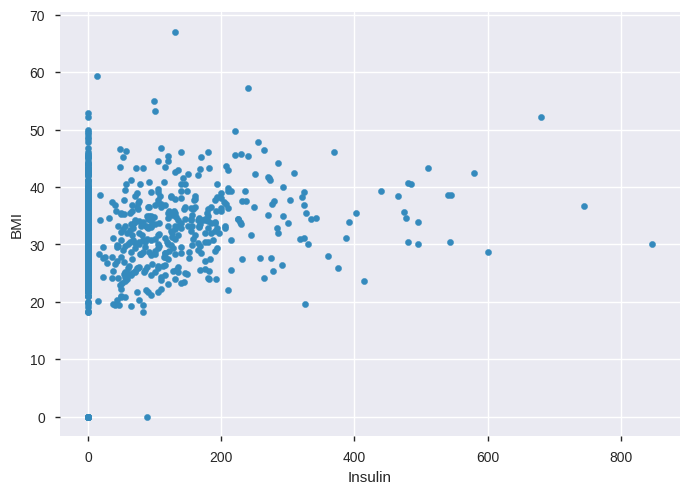

In [ ]:
# scatter plot: A scatter plot is a diagram where each value in the data set is represented by a dot. 
data1.plot(kind = "scatter",x="Insulin",y = "BMI")
plt.show()

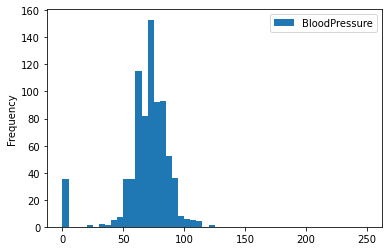

In [ ]:
# hist plot : A histogram is basically used to represent data provided in a form of some groups.It is accurate method for the graphical representation of numerical data distribution.It is a type of bar plot where X-axis represents the bin ranges while Y-axis gives information about frequency.
data1.plot(kind = "hist",y = "BloodPressure",bins = 50,range= (0,250))

In [ ]:
# pandas, a missing value is denoted by NaN
data.isnull()

,a,b,c,d,e
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
95,False,False,False,False,False
96,False,False,False,False,False
97,False,False,False,False,False
98,False,False,False,False,False


In [ ]:
# get the number of missing data points per column
missing_values_count = data.isnull().sum()

In [ ]:
# look at the # of missing points in the first ten columns
missing_values_count[0:10]

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# Features Selection
# iloc() function enables us to select a particular cell of the dataset, that is, it helps us select a value that belongs to a particular row or column from a set of values of a data frame or dataset.

x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [ ]:
# feature selection
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
x = data[feature_cols]
y = data.Outcome

In [ ]:
# remove all the rows that contain a missing value
data.dropna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
# remove all columns with at least one missing value
columns_with_na_dropped = data.dropna(axis=1)
columns_with_na_dropped.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#split Data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
# Build model
dtc = DecisionTreeClassifier()
dtc = dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)

In [ ]:
print(y_pred)

[0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 1 1 0
 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0
 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0
 1 0 0 1 0 0]


In [ ]:
# confusion matrix: A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. The confusion matrix itself is relatively simple to understand, but the related terminology can be confusing.

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

# accuracy
#print("Accuracy:", metrics.accuracy_score(y_test,y_pred)

[[72 27]
 [21 34]]


In [ ]:
# Evaluate Model

metrics.accuracy_score(y_test,y_pred)

0.6883116883116883

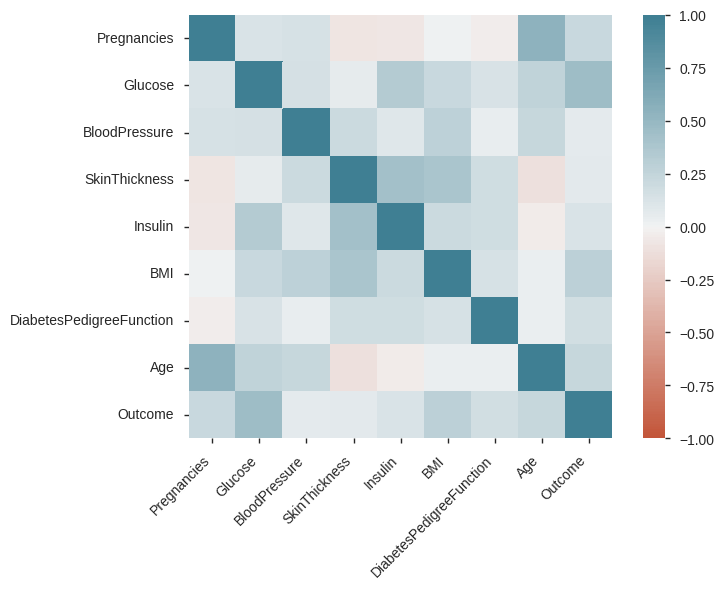

In [ ]:
#correlation map
import seaborn as sns
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
data.columns[:-1]

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

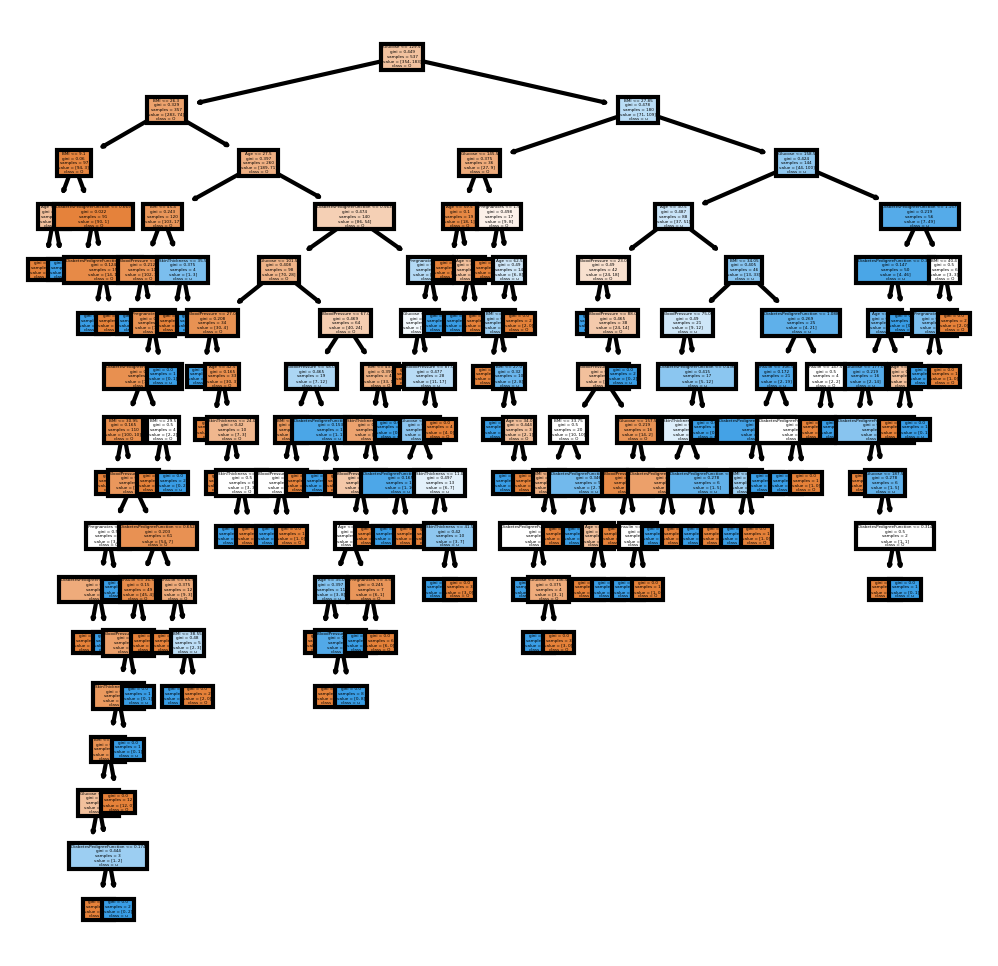

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

features = data.columns[:-1]

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(dtc,feature_names = features,class_names=data.columns[-1],
           filled = True);

fig.savefig('imagename.png')

In [ ]:
from sklearn import tree

[Text(0.39561170212765956, 0.9705882352941176, 'X[1] <= 129.5\ngini = 0.449\nsamples = 537\nvalue = [354, 183]'),
 Text(0.14195478723404256, 0.9117647058823529, 'X[5] <= 26.3\ngini = 0.329\nsamples = 357\nvalue = [283, 74]'),
 Text(0.0425531914893617, 0.8529411764705882, 'X[5] <= 9.1\ngini = 0.06\nsamples = 97\nvalue = [94, 3]'),
 Text(0.02127659574468085, 0.7941176470588235, 'X[7] <= 28.0\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.010638297872340425, 0.7352941176470589, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.031914893617021274, 0.7352941176470589, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.06382978723404255, 0.7941176470588235, 'X[6] <= 0.669\ngini = 0.022\nsamples = 91\nvalue = [90, 1]'),
 Text(0.05319148936170213, 0.7352941176470589, 'gini = 0.0\nsamples = 76\nvalue = [76, 0]'),
 Text(0.07446808510638298, 0.7352941176470589, 'X[6] <= 0.705\ngini = 0.124\nsamples = 15\nvalue = [14, 1]'),
 Text(0.06382978723404255, 0.6764705882352942, 'gini = 0.0\nsamp

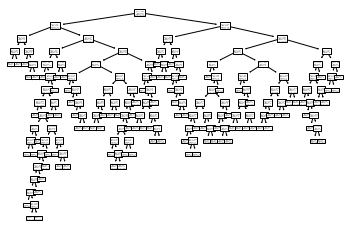

In [ ]:
tree.plot_tree(dtc) 

In [ ]:
import graphviz 

In [ ]:
dot_data = tree.export_graphviz(dtc, out_file=None)

In [ ]:
graph = graphviz.Source(dot_data) 

In [ ]:
dot_data = tree.export_graphviz(dtc, out_file=None,
                                filled=True, rounded=True,special_characters=True)  

In [ ]:
graph = graphviz.Source(dot_data) 

In [ ]:
graph.view()

'Source.gv.pdf'